In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../data/logs/subj_0_block_0.log')

In [3]:
df

,seed,sub_num,block_num,seq_num,target,tone_num,freq,mark,is_target,n_targets,response,correct,score
0,0,0,0,0,200,1,130,1,0,14,0,0,0
1,0,0,0,0,200,2,200,2,1,14,0,0,0
2,0,0,0,0,200,3,280,3,0,14,0,0,0
3,0,0,0,0,200,4,200,2,1,14,0,0,0
4,0,0,0,0,200,5,200,2,1,14,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324001,990417,99,4,17,200,38,280,3,0,12,0,0,0
324002,990417,99,4,17,200,39,130,1,0,12,0,0,0
324003,990417,99,4,17,200,40,200,2,1,12,0,0,0
324004,990417,99,4,17,200,41,130,1,0,12,0,0,0


In [4]:
# Count occurences of each tone
print(sum(df['freq'] == 130))
print(sum(df['freq'] == 200))
print(sum(df['freq'] == 280))

108020
108240
107746


In [5]:
# Count occurences of each tone as target
print(sum((df['freq'] == 130) & (df['target'] == 130)))
print(sum((df['freq'] == 200) & (df['target'] == 200)))
print(sum((df['freq'] == 280) & (df['target'] == 280)))

35109
36702
36207


In [6]:
# Count occurences of each sequence length
print(sum(df['tone_num'] == 30) - sum(df['tone_num'] == 36))
print(sum(df['tone_num'] == 36) - sum(df['tone_num'] == 42))
print(sum(df['tone_num'] == 42))

2997
3005
2998


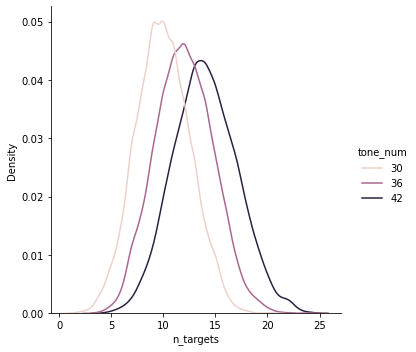

In [37]:
# Distribution of target number depending on seq length
index_final_tone = np.where(df['tone_num'] == 1)[0]-1
index_final_tone = np.delete(index_final_tone, 0)
df_final_tone = df.iloc[index_final_tone,]
sns.displot(df_final_tone, x = 'n_targets', hue = 'tone_num', kind = 'kde')

In [38]:
df_final_tone

,seed,sub_num,block_num,seq_num,target,tone_num,freq,mark,is_target,n_targets,response,correct,score
35,0,0,0,0,200,36,130,1,0,14,0,0,0
77,1,0,0,1,130,42,130,1,1,16,0,0,0
107,2,0,0,2,130,30,200,2,0,7,0,0,0
149,3,0,0,3,130,42,200,2,0,13,0,0,0
185,4,0,0,4,130,36,280,3,0,14,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323825,990412,99,4,12,280,30,130,1,0,13,0,0,0
323861,990413,99,4,13,130,36,280,3,0,17,0,0,0
323891,990414,99,4,14,130,30,130,1,1,10,0,0,0
323921,990415,99,4,15,280,30,200,2,0,7,0,0,0
